In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t_mat = np.ones((3, 3)) # rock, paper, scissors
mat_result = [      # row: user choice, col: ai choice
    [0, 1, -1],     # rock
    [-1, 0, 1],      # paper
    [1, -1, 0]      # scissors
]
prev_move = 0   # the first computer move will always be 'rock', simplifies logic
variants = np.array([0, 1, 2])
iter = 10   # total iterations

In [3]:
my_steps = []
with open('my_steps.data') as f:
    my_steps = [int(line) for line in f]

In [4]:
def index_to_win(choice): # choice == 0 -> 1, choice == 1 -> 2, choice == 2 -> 0
    return choice + 1 if choice != 2 else 0

In [7]:
win_loss_list = np.zeros((iter,))
for i in range(iter):
    win_loss = 0
    for my_choice in my_steps:
        pred = np.random.choice(variants, p = t_mat[prev_move] / t_mat[prev_move].sum())
        win_loss += mat_result[my_choice][index_to_win(pred)] # [my_choice][ai_choice]
        t_mat[prev_move][my_choice] += 1
        prev_move = my_choice
    win_loss_list[i] = win_loss
win_loss_list /= len(my_steps)

print(t_mat)

[[  2. 241.   1.]
 [  1.   1. 241.]
 [240.   1.   1.]]


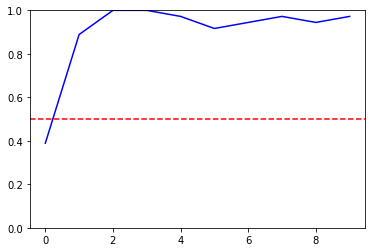

In [6]:
plt.ylim([0, 1])
plt.axhline(y=0.5, color='r', linestyle='--')
plt.plot(win_loss_list, 'b')